In [1]:
import tensorflow as tf
import numpy as np
import keras
import wget
from pathlib import Path
import tensorflow_io as tfio

from keras.models import load_model
from keras.models import model_from_json

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from src.utils import *
from src.model import *
from src.train import *

%matplotlib inline

tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

2024-12-03 05:28:50.159319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 05:28:50.337265: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 05:28:51.298130: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-12-03 05:28:51.298210: W tensorflow/

Load Pretrained Model

In [3]:
# Import Comp2Comp model, version "stanford_v0.0.1"
model_name = "stanford_v0.0.1"
model_dir = './'
try:
    filename = find_model_weights(model_name, model_dir)
except Exception:
    print("Downloading muscle/fat model from hugging face")
    Path(model_dir).mkdir(parents=True, exist_ok=True)
    wget.download(
        f"https://huggingface.co/stanfordmimi/stanford_abct_v0.0.1/resolve/main/{model_name}.h5",
        out=os.path.join(model_dir, f"{model_name}.h5"),
    )
    filename = find_model_weights(model_name, model_dir)
    print("")

print("Loading muscle/fat model from {}".format(filename))
download_muscle_adipose_tissue_model('./')
model_c2c = load_model(filename)
c2c_weights = model_c2c.get_weights()
# model_c2c.summary()

Loading muscle/fat model from ./stanford_v0.0.1.h5
Muscle and adipose tissue model already downloaded.


2024-12-03 05:28:53.643002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 05:28:55.094661: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46694 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:4f:00.0, compute capability: 8.6
2024-12-03 05:28:55.095574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46694 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:ce:00.0, compute capability: 8.6


In [5]:
image_list = ['./inputs/AC42132bb-AC4213690-CT.dcm',
'./inputs/AC42132bc-AC42164ba-CT.dcm',
'./inputs/AC4213342-AC4213717-CT.dcm',
'./inputs/AC4213402-AC42137d8-CT.dcm',
'./inputs/AC4213416-AC42137ec-CT.dcm',
'./inputs/AC4213422-AC42137f9-CT.dcm',
'./inputs/AC4213461-AC4213839-CT.dcm',
'./inputs/AC42134ec-AC42138c7-CT.dcm',
'./inputs/AC4213a71-AC4213e2b-CT.dcm',
'./inputs/AC4213af5-AC4213eb5-CT.dcm',
'./inputs/AC421420b-AC4243aec-CT.dcm',
'./inputs/AC421427b-AC4214618-CT.dcm',
'./inputs/AC42142d6-AC4243063-CT.dcm',
'./inputs/AC42142f9-AC421469e-CT.dcm',
'./inputs/AC4214306-AC423f75a-CT.dcm',
'./inputs/AC421439b-AC4214750-CT.dcm',
'./inputs/AC4214412-AC42147d2-CT.dcm',
'./inputs/AC4214947-AC4214ccd-CT.dcm',
'./inputs/AC4214a78-AC4214e1f-CT.dcm',
'./inputs/AC4214bfb-AC4214fcf-CT.dcm',
'./inputs/AC4215183-AC4215506-CT.dcm',
'./inputs/AC4215221-AC42155bc-CT.dcm',
'./inputs/AC4215255-AC42155f7-CT.dcm',
'./inputs/AC4215279-AC421561e-CT.dcm',
'./inputs/AC4215897-AC4215bec-CT.dcm',
'./inputs/AC42158a1-AC4240972-CT.dcm',
'./inputs/AC4215999-AC4215d1b-CT.dcm',
'./inputs/AC42159ce-AC4215d52-CT.dcm',
'./inputs/AC4215a72-AC42439ee-CT.dcm',
'./inputs/AC4215a9a-AC4215e57-CT.dcm',
'./inputs/AC4215f4b-AC4216298-CT.dcm',
'./inputs/AC4216026-AC4216397-CT.dcm',
'./inputs/AC4216057-AC42163d0-CT.dcm',
'./inputs/AC4216186-AC4216545-CT.dcm',
'./inputs/AC42161e7-AC42165ba-CT.dcm',
'./inputs/AC4216644-AC421696b-CT.dcm',
'./inputs/AC4216651-AC421697b-CT.dcm',
'./inputs/AC4216727-AC4216a7e-CT.dcm',
'./inputs/AC4216745-AC4216a9d-CT.dcm',
'./inputs/AC421675d-AC4216ac0-CT.dcm',
'./inputs/AC42167a1-AC4216b14-CT.dcm',
'./inputs/AC421681d-AC4216bab-CT.dcm',
'./inputs/AC42168a7-AC4216c5b-CT.dcm',
'./inputs/AC421690d-AC4216cdd-CT.dcm',
'./inputs/AC4216d54-AC4216dca-CT.dcm',
'./inputs/AC4216d8b-AC4216e14-CT.dcm',
'./inputs/AC423ba9c-AC423bde2-CT.dcm',
'./inputs/AC423bada-AC423be2f-CT.dcm',
'./inputs/AC423bb02-AC423be60-CT.dcm',
'./inputs/AC423bbbe-AC423bf35-CT.dcm',
'./inputs/AC423bbe0-AC423bf5e-CT.dcm',
'./inputs/AC423bcf9-AC423c0b3-CT.dcm',
'./inputs/AC423bd5c-AC423c129-CT.dcm',
'./inputs/AC423bd83-AC42436c3-CT.dcm',
'./inputs/AC423c1ca-AC423c4df-CT.dcm',
'./inputs/AC423c225-AC423c559-CT.dcm',
'./inputs/AC423c27e-AC4243093-CT.dcm',
'./inputs/AC423c293-AC423c5e5-CT.dcm',
'./inputs/AC423c2b4-AC423c614-CT.dcm',
'./inputs/AC423c46c-AC423c847-CT.dcm',
'./inputs/AC423c8fc-AC423cc1c-CT.dcm',
'./inputs/AC423c97c-AC423ccba-CT.dcm',
'./inputs/AC423c9c1-AC423cd0e-CT.dcm',
'./inputs/AC423ca55-AC423cdc7-CT.dcm',
'./inputs/AC423ca9a-AC4240d93-CT.dcm',
'./inputs/AC423cb5d-AC423cf2c-CT.dcm',
'./inputs/AC423cb92-AC423cf72-CT.dcm',
'./inputs/AC423cfb0-AC423e01b-CT.dcm',
'./inputs/AC423cfe7-AC423d2da-CT.dcm',
'./inputs/AC423d09f-AC423d3d6-CT.dcm',
'./inputs/AC423d0b5-AC423d3f5-CT.dcm',
'./inputs/AC423d11f-AC423d47a-CT.dcm',
'./inputs/AC423d13f-AC423d4a4-CT.dcm',
'./inputs/AC423d1dd-AC423d586-CT.dcm',
'./inputs/AC423d1e6-AC423d590-CT.dcm',
'./inputs/AC423d1fb-AC4242755-CT.dcm',
'./inputs/AC423d20c-AC423d5c5-CT.dcm',
'./inputs/AC423d25f-AC423d63f-CT.dcm',
'./inputs/AC423d672-AC4242385-CT.dcm',
'./inputs/AC423d684-AC423d966-CT.dcm',
'./inputs/AC423d7be-AC423db13-CT.dcm',
'./inputs/AC423d825-AC423dbb1-CT.dcm',
'./inputs/AC423d89e-AC423dc53-CT.dcm',
'./inputs/AC423d917-AC423dcfa-CT.dcm',
'./inputs/AC423dd59-AC423e030-CT.dcm',
'./inputs/AC423dd5f-AC423e03a-CT.dcm',
'./inputs/AC423dd96-AC423e089-CT.dcm',
'./inputs/AC423dda4-AC423e097-CT.dcm',
'./inputs/AC423de2c-AC423e167-CT.dcm',
'./inputs/AC423de32-AC423e170-CT.dcm',
'./inputs/AC423de52-AC423e19f-CT.dcm',
'./inputs/AC423df13-AC423e2b9-CT.dcm',
'./inputs/AC423df5d-AC423e323-CT.dcm',
'./inputs/AC423df62-AC423e32b-CT.dcm',
'./inputs/AC423dfb2-AC423e398-CT.dcm',
'./inputs/AC423e3ea-AC423e6c1-CT.dcm',
'./inputs/AC423e4c1-AC423e7f3-CT.dcm',
'./inputs/AC423e4da-AC423e813-CT.dcm',
'./inputs/AC423e4f9-AC423e842-CT.dcm',
'./inputs/AC423e5b7-AC423e952-CT.dcm',
'./inputs/AC423e5e8-AC423e99e-CT.dcm',
'./inputs/AC423eb19-AC423ee23-CT.dcm',
'./inputs/AC423eb42-AC423ee5c-CT.dcm',
'./inputs/AC423ebd3-AC423ef2b-CT.dcm',
'./inputs/AC423ec69-AC423f006-CT.dcm',
'./inputs/AC423ec9e-AC423f058-CT.dcm',
'./inputs/AC423ecf1-AC423f0d0-CT.dcm',
'./inputs/AC423f244-AC42426f6-CT.dcm',
'./inputs/AC423f283-AC423f5e6-CT.dcm',
'./inputs/AC423f2fc-AC423f696-CT.dcm',
'./inputs/AC423f7f2-AC423fac4-CT.dcm',
'./inputs/AC423f823-AC423fb13-CT.dcm',
'./inputs/AC423f82b-AC423fb1c-CT.dcm',
'./inputs/AC423f867-AC423fb77-CT.dcm',
'./inputs/AC423f87c-AC423fb94-CT.dcm',
'./inputs/AC423f8a0-AC423fbc5-CT.dcm',
'./inputs/AC423f910-AC423fc64-CT.dcm',
'./inputs/AC423f912-AC423fc66-CT.dcm',
'./inputs/AC423f91c-AC423fc75-CT.dcm',
'./inputs/AC423f92e-AC423fc8c-CT.dcm',
'./inputs/AC423f9bf-AC423fd7c-CT.dcm',
'./inputs/AC423f9da-AC423fda3-CT.dcm',
'./inputs/AC423fe3a-AC42400ef-CT.dcm',
'./inputs/AC423ffce-AC4240331-CT.dcm',
'./inputs/AC4240050-AC4240407-CT.dcm',
'./inputs/AC42404af-AC4240752-CT.dcm',
'./inputs/AC4240502-AC42407d4-CT.dcm',
'./inputs/AC424052b-AC424080c-CT.dcm',
'./inputs/AC4240590-AC42408b6-CT.dcm',
'./inputs/AC42405b2-AC42408e8-CT.dcm',
'./inputs/AC42405bd-AC42408f5-CT.dcm',
'./inputs/AC42405d9-AC42453d8-CT.dcm',
'./inputs/AC424062b-AC424099e-CT.dcm',
'./inputs/AC4240686-AC4240a2a-CT.dcm',
'./inputs/AC4240be6-AC4240ee5-CT.dcm',
'./inputs/AC4240c99-AC424100e-CT.dcm',
'./inputs/AC4240c9a-AC4241010-CT.dcm',
'./inputs/AC4241141-AC42413cc-CT.dcm',
'./inputs/AC4241237-AC4241541-CT.dcm',
'./inputs/AC4241355-AC42416fc-CT.dcm',
'./inputs/AC4241370-AC424171f-CT.dcm',
'./inputs/AC4241380-AC424173e-CT.dcm',
'./inputs/AC4241891-AC4241b8d-CT.dcm',
'./inputs/AC4241908-AC4241c4f-CT.dcm',
'./inputs/AC424193b-AC4241ca2-CT.dcm',
'./inputs/AC424193d-AC4241ca4-CT.dcm',
'./inputs/AC424194b-AC4241cbb-CT.dcm',
'./inputs/AC42419c1-AC4241d7c-CT.dcm',
'./inputs/AC42419e6-AC4241db6-CT.dcm',
'./inputs/AC42419e9-AC4241dbb-CT.dcm',
'./inputs/AC42419f4-AC4241dc7-CT.dcm',
'./inputs/AC4241eef-AC42421f1-CT.dcm',
'./inputs/AC4241f0b-AC424546b-CT.dcm',
'./inputs/AC4241fad-AC4242327-CT.dcm',
'./inputs/AC4241fb0-AC424232f-CT.dcm',
'./inputs/AC4241fff-AC42423a6-CT.dcm',
'./inputs/AC424201d-AC42423db-CT.dcm',
'./inputs/AC424202d-AC42423f9-CT.dcm',
'./inputs/AC4242030-AC4242400-CT.dcm',
'./inputs/AC424244a-AC42426be-CT.dcm',
'./inputs/AC424248d-AC424272c-CT.dcm',
'./inputs/AC42424cd-AC4242793-CT.dcm',
'./inputs/AC424255a-AC4242886-CT.dcm',
'./inputs/AC4242575-AC42428ba-CT.dcm',
'./inputs/AC424257b-AC42428c4-CT.dcm',
'./inputs/AC42425a2-AC4242905-CT.dcm',
'./inputs/AC42425a9-AC4242914-CT.dcm',
'./inputs/AC42425ad-AC4242922-CT.dcm',
'./inputs/AC42425d3-AC424295b-CT.dcm',
'./inputs/AC42425e1-AC4242971-CT.dcm',
'./inputs/AC424265f-AC424351e-CT.dcm',
'./inputs/AC4242ad6-AC4242d5c-CT.dcm',
'./inputs/AC4242c01-AC4242f43-CT.dcm',
'./inputs/AC42430ee-AC424335e-CT.dcm',
'./inputs/AC4243244-AC42435aa-CT.dcm',
'./inputs/AC42432ab-AC424365c-CT.dcm',
'./inputs/AC42432b2-AC424366b-CT.dcm',
'./inputs/AC4243806-AC4243b1f-CT.dcm',
'./inputs/AC4243880-AC4243bff-CT.dcm',
'./inputs/AC424388d-AC4243c15-CT.dcm',
'./inputs/AC42438a5-AC4243c41-CT.dcm',
'./inputs/AC42438cf-AC4243c93-CT.dcm',
'./inputs/AC4243e01-AC4244115-CT.dcm',
'./inputs/AC4243e22-AC424415a-CT.dcm',
'./inputs/AC4243e45-AC42441a0-CT.dcm',
'./inputs/AC4243e91-AC424420d-CT.dcm',
'./inputs/AC424436b-AC42445de-CT.dcm',
'./inputs/AC4244384-AC4244608-CT.dcm',
'./inputs/AC4244430-AC4244742-CT.dcm',
'./inputs/AC424443b-AC4244757-CT.dcm',
'./inputs/AC4244451-AC4244778-CT.dcm',
'./inputs/AC42444ed-AC424488e-CT.dcm',
'./inputs/AC4244956-AC4244b95-CT.dcm',
'./inputs/AC424496f-AC4244bc7-CT.dcm',
'./inputs/AC42449e6-AC4244cad-CT.dcm',
'./inputs/AC4244a1d-AC4244d10-CT.dcm',
'./inputs/AC4244a89-AC4244dc8-CT.dcm',
'./inputs/AC4244aed-AC4244e7a-CT.dcm',
]

In [6]:
mask_list = ['./labels/AC42132bb-AC4213690.dcm',
'./labels/AC42132bc-AC42164ba.dcm',
'./labels/AC4213342-AC4213717.dcm',
'./labels/AC4213402-AC42137d8.dcm',
'./labels/AC4213416-AC42137ec.dcm',
'./labels/AC4213422-AC42137f9.dcm',
'./labels/AC4213461-AC4213839.dcm',
'./labels/AC42134ec-AC42138c7.dcm',
'./labels/AC4213a71-AC4213e2b.dcm',
'./labels/AC4213af5-AC4213eb5.dcm',
'./labels/AC421420b-AC4243aec.dcm',
'./labels/AC421427b-AC4214618.dcm',
'./labels/AC42142d6-AC4243063.dcm',
'./labels/AC42142f9-AC421469e.dcm',
'./labels/AC4214306-AC423f75a.dcm',
'./labels/AC421439b-AC4214750.dcm',
'./labels/AC4214412-AC42147d2.dcm',
'./labels/AC4214947-AC4214ccd.dcm',
'./labels/AC4214a78-AC4214e1f.dcm',
'./labels/AC4214bfb-AC4214fcf.dcm',
'./labels/AC4215183-AC4215506.dcm',
'./labels/AC4215221-AC42155bc.dcm',
'./labels/AC4215255-AC42155f7.dcm',
'./labels/AC4215279-AC421561e.dcm',
'./labels/AC4215897-AC4215bec.dcm',
'./labels/AC42158a1-AC4240972.dcm',
'./labels/AC4215999-AC4215d1b.dcm',
'./labels/AC42159ce-AC4215d52.dcm',
'./labels/AC4215a72-AC42439ee.dcm',
'./labels/AC4215a9a-AC4215e57.dcm',
'./labels/AC4215f4b-AC4216298.dcm',
'./labels/AC4216026-AC4216397.dcm',
'./labels/AC4216057-AC42163d0.dcm',
'./labels/AC4216186-AC4216545.dcm',
'./labels/AC42161e7-AC42165ba.dcm',
'./labels/AC4216644-AC421696b.dcm',
'./labels/AC4216651-AC421697b.dcm',
'./labels/AC4216727-AC4216a7e.dcm',
'./labels/AC4216745-AC4216a9d.dcm',
'./labels/AC421675d-AC4216ac0.dcm',
'./labels/AC42167a1-AC4216b14.dcm',
'./labels/AC421681d-AC4216bab.dcm',
'./labels/AC42168a7-AC4216c5b.dcm',
'./labels/AC421690d-AC4216cdd.dcm',
'./labels/AC4216d54-AC4216dca.dcm',
'./labels/AC4216d8b-AC4216e14.dcm',
'./labels/AC423ba9c-AC423bde2.dcm',
'./labels/AC423bada-AC423be2f.dcm',
'./labels/AC423bb02-AC423be60.dcm',
'./labels/AC423bbbe-AC423bf35.dcm',
'./labels/AC423bbe0-AC423bf5e.dcm',
'./labels/AC423bcf9-AC423c0b3.dcm',
'./labels/AC423bd5c-AC423c129.dcm',
'./labels/AC423bd83-AC42436c3.dcm',
'./labels/AC423c1ca-AC423c4df.dcm',
'./labels/AC423c225-AC423c559.dcm',
'./labels/AC423c27e-AC4243093.dcm',
'./labels/AC423c293-AC423c5e5.dcm',
'./labels/AC423c2b4-AC423c614.dcm',
'./labels/AC423c46c-AC423c847.dcm',
'./labels/AC423c8fc-AC423cc1c.dcm',
'./labels/AC423c97c-AC423ccba.dcm',
'./labels/AC423c9c1-AC423cd0e.dcm',
'./labels/AC423ca55-AC423cdc7.dcm',
'./labels/AC423ca9a-AC4240d93.dcm',
'./labels/AC423cb5d-AC423cf2c.dcm',
'./labels/AC423cb92-AC423cf72.dcm',
'./labels/AC423cfb0-AC423e01b.dcm',
'./labels/AC423cfe7-AC423d2da.dcm',
'./labels/AC423d09f-AC423d3d6.dcm',
'./labels/AC423d0b5-AC423d3f5.dcm',
'./labels/AC423d11f-AC423d47a.dcm',
'./labels/AC423d13f-AC423d4a4.dcm',
'./labels/AC423d1dd-AC423d586.dcm',
'./labels/AC423d1e6-AC423d590.dcm',
'./labels/AC423d1fb-AC4242755.dcm',
'./labels/AC423d20c-AC423d5c5.dcm',
'./labels/AC423d25f-AC423d63f.dcm',
'./labels/AC423d672-AC4242385.dcm',
'./labels/AC423d684-AC423d966.dcm',
'./labels/AC423d7be-AC423db13.dcm',
'./labels/AC423d825-AC423dbb1.dcm',
'./labels/AC423d89e-AC423dc53.dcm',
'./labels/AC423d917-AC423dcfa.dcm',
'./labels/AC423dd59-AC423e030.dcm',
'./labels/AC423dd5f-AC423e03a.dcm',
'./labels/AC423dd96-AC423e089.dcm',
'./labels/AC423dda4-AC423e097.dcm',
'./labels/AC423de2c-AC423e167.dcm',
'./labels/AC423de32-AC423e170.dcm',
'./labels/AC423de52-AC423e19f.dcm',
'./labels/AC423df13-AC423e2b9.dcm',
'./labels/AC423df5d-AC423e323.dcm',
'./labels/AC423df62-AC423e32b.dcm',
'./labels/AC423dfb2-AC423e398.dcm',
'./labels/AC423e3ea-AC423e6c1.dcm',
'./labels/AC423e4c1-AC423e7f3.dcm',
'./labels/AC423e4da-AC423e813.dcm',
'./labels/AC423e4f9-AC423e842.dcm',
'./labels/AC423e5b7-AC423e952.dcm',
'./labels/AC423e5e8-AC423e99e.dcm',
'./labels/AC423eb19-AC423ee23.dcm',
'./labels/AC423eb42-AC423ee5c.dcm',
'./labels/AC423ebd3-AC423ef2b.dcm',
'./labels/AC423ec69-AC423f006.dcm',
'./labels/AC423ec9e-AC423f058.dcm',
'./labels/AC423ecf1-AC423f0d0.dcm',
'./labels/AC423f244-AC42426f6.dcm',
'./labels/AC423f283-AC423f5e6.dcm',
'./labels/AC423f2fc-AC423f696.dcm',
'./labels/AC423f7f2-AC423fac4.dcm',
'./labels/AC423f823-AC423fb13.dcm',
'./labels/AC423f82b-AC423fb1c.dcm',
'./labels/AC423f867-AC423fb77.dcm',
'./labels/AC423f87c-AC423fb94.dcm',
'./labels/AC423f8a0-AC423fbc5.dcm',
'./labels/AC423f910-AC423fc64.dcm',
'./labels/AC423f912-AC423fc66.dcm',
'./labels/AC423f91c-AC423fc75.dcm',
'./labels/AC423f92e-AC423fc8c.dcm',
'./labels/AC423f9bf-AC423fd7c.dcm',
'./labels/AC423f9da-AC423fda3.dcm',
'./labels/AC423fe3a-AC42400ef.dcm',
'./labels/AC423ffce-AC4240331.dcm',
'./labels/AC4240050-AC4240407.dcm',
'./labels/AC42404af-AC4240752.dcm',
'./labels/AC4240502-AC42407d4.dcm',
'./labels/AC424052b-AC424080c.dcm',
'./labels/AC4240590-AC42408b6.dcm',
'./labels/AC42405b2-AC42408e8.dcm',
'./labels/AC42405bd-AC42408f5.dcm',
'./labels/AC42405d9-AC42453d8.dcm',
'./labels/AC424062b-AC424099e.dcm',
'./labels/AC4240686-AC4240a2a.dcm',
'./labels/AC4240be6-AC4240ee5.dcm',
'./labels/AC4240c99-AC424100e.dcm',
'./labels/AC4240c9a-AC4241010.dcm',
'./labels/AC4241141-AC42413cc.dcm',
'./labels/AC4241237-AC4241541.dcm',
'./labels/AC4241355-AC42416fc.dcm',
'./labels/AC4241370-AC424171f.dcm',
'./labels/AC4241380-AC424173e.dcm',
'./labels/AC4241891-AC4241b8d.dcm',
'./labels/AC4241908-AC4241c4f.dcm',
'./labels/AC424193b-AC4241ca2.dcm',
'./labels/AC424193d-AC4241ca4.dcm',
'./labels/AC424194b-AC4241cbb.dcm',
'./labels/AC42419c1-AC4241d7c.dcm',
'./labels/AC42419e6-AC4241db6.dcm',
'./labels/AC42419e9-AC4241dbb.dcm',
'./labels/AC42419f4-AC4241dc7.dcm',
'./labels/AC4241eef-AC42421f1.dcm',
'./labels/AC4241f0b-AC424546b.dcm',
'./labels/AC4241fad-AC4242327.dcm',
'./labels/AC4241fb0-AC424232f.dcm',
'./labels/AC4241fff-AC42423a6.dcm',
'./labels/AC424201d-AC42423db.dcm',
'./labels/AC424202d-AC42423f9.dcm',
'./labels/AC4242030-AC4242400.dcm',
'./labels/AC424244a-AC42426be.dcm',
'./labels/AC424248d-AC424272c.dcm',
'./labels/AC42424cd-AC4242793.dcm',
'./labels/AC424255a-AC4242886.dcm',
'./labels/AC4242575-AC42428ba.dcm',
'./labels/AC424257b-AC42428c4.dcm',
'./labels/AC42425a2-AC4242905.dcm',
'./labels/AC42425a9-AC4242914.dcm',
'./labels/AC42425ad-AC4242922.dcm',
'./labels/AC42425d3-AC424295b.dcm',
'./labels/AC42425e1-AC4242971.dcm',
'./labels/AC424265f-AC424351e.dcm',
'./labels/AC4242ad6-AC4242d5c.dcm',
'./labels/AC4242c01-AC4242f43.dcm',
'./labels/AC42430ee-AC424335e.dcm',
'./labels/AC4243244-AC42435aa.dcm',
'./labels/AC42432ab-AC424365c.dcm',
'./labels/AC42432b2-AC424366b.dcm',
'./labels/AC4243806-AC4243b1f.dcm',
'./labels/AC4243880-AC4243bff.dcm',
'./labels/AC424388d-AC4243c15.dcm',
'./labels/AC42438a5-AC4243c41.dcm',
'./labels/AC42438cf-AC4243c93.dcm',
'./labels/AC4243e01-AC4244115.dcm',
'./labels/AC4243e22-AC424415a.dcm',
'./labels/AC4243e45-AC42441a0.dcm',
'./labels/AC4243e91-AC424420d.dcm',
'./labels/AC424436b-AC42445de.dcm',
'./labels/AC4244384-AC4244608.dcm',
'./labels/AC4244430-AC4244742.dcm',
'./labels/AC424443b-AC4244757.dcm',
'./labels/AC4244451-AC4244778.dcm',
'./labels/AC42444ed-AC424488e.dcm',
'./labels/AC4244956-AC4244b95.dcm',
'./labels/AC424496f-AC4244bc7.dcm',
'./labels/AC42449e6-AC4244cad.dcm',
'./labels/AC4244a1d-AC4244d10.dcm',
'./labels/AC4244a89-AC4244dc8.dcm',
'./labels/AC4244aed-AC4244e7a.dcm',
]

In [7]:
processed_img_ds_train, processed_image_ds_val, processed_image_ds_test = load_muscle_data(image_list, mask_list)

Choosing the number of layers to unfreeze in the decoder.

Epoch 1/30


2024-12-03 05:50:31.635513: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_13/dropout_66/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - ETA: 0s - loss: -0.0533 - accuracy: 0.5037
Epoch 1: val_loss improved from inf to -0.03695, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n1.keras
20/20 [==============================] - 9s 304ms/step - loss: -0.0533 - accuracy: 0.5037 - val_loss: -0.0369 - val_accuracy: 0.6490
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: -0.0822 - accuracy: 0.6231
Epoch 2: val_loss improved from -0.03695 to -0.04038, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n1.keras
20/20 [==============================] - 5s 257ms/step - loss: -0.0822 - accuracy: 0.6231 - val_loss: -0.0404 - val_accuracy: 0.6278
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: -0.0897 - accuracy: 0.6198
Epoch 3: val_loss improved from -0.04038 to -0.04302, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n1.keras
20/20 [==============================] - 5s 255ms/step - loss: -0.0897 -

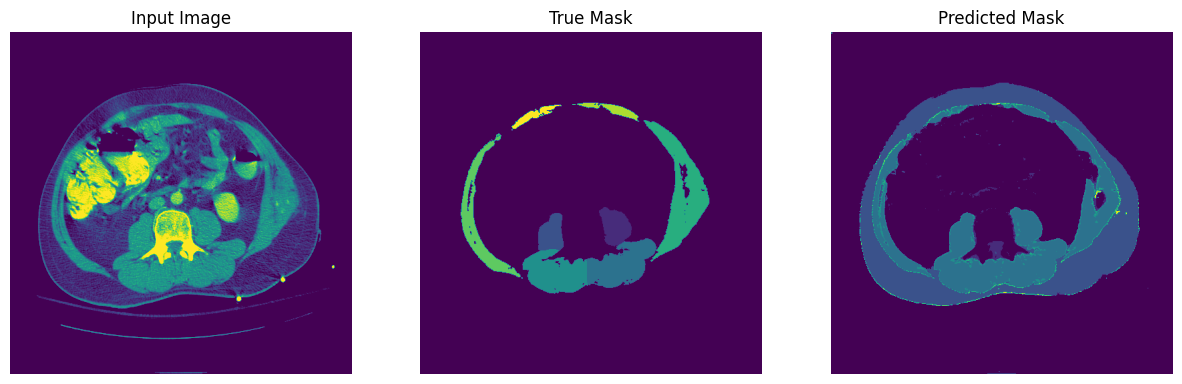

(512, 512, 3)
8/8 [==============================] - 0s 10ms/step
(8, 512, 512, 1)


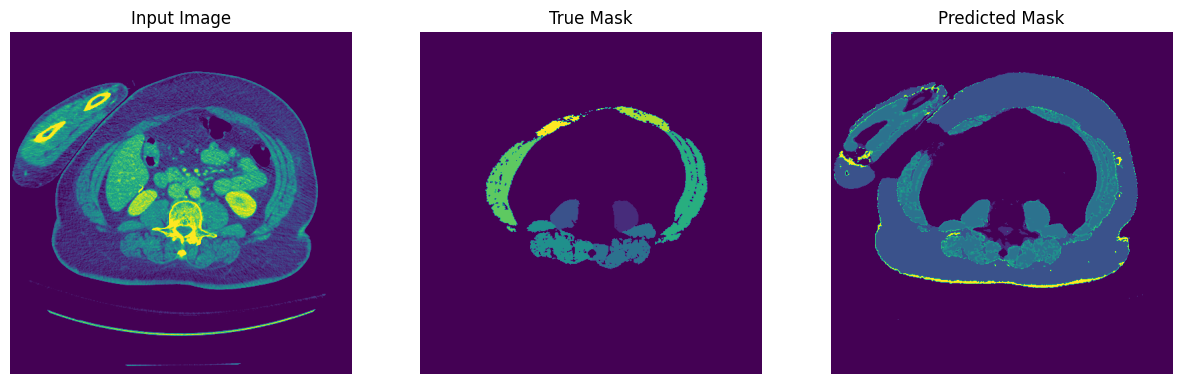

Epoch 1/30


2024-12-03 05:52:34.967830: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_15/dropout_77/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - ETA: 0s - loss: -0.0660 - accuracy: 0.0919
Epoch 1: val_loss improved from inf to -0.05522, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n3.keras
20/20 [==============================] - 9s 319ms/step - loss: -0.0660 - accuracy: 0.0919 - val_loss: -0.0552 - val_accuracy: 0.0962
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: -0.0896 - accuracy: 0.0929
Epoch 2: val_loss did not improve from -0.05522
20/20 [==============================] - 4s 196ms/step - loss: -0.0896 - accuracy: 0.0929 - val_loss: -0.0412 - val_accuracy: 0.0956
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: -0.0948 - accuracy: 0.0898
Epoch 3: val_loss did not improve from -0.05522
20/20 [==============================] - 4s 197ms/step - loss: -0.0948 - accuracy: 0.0898 - val_loss: -0.0489 - val_accuracy: 0.0945
Epoch 4/30
20/20 [==============================] - ETA: 0s - loss: -0.0991 - accuracy: 0.0924
Epoch 4: v

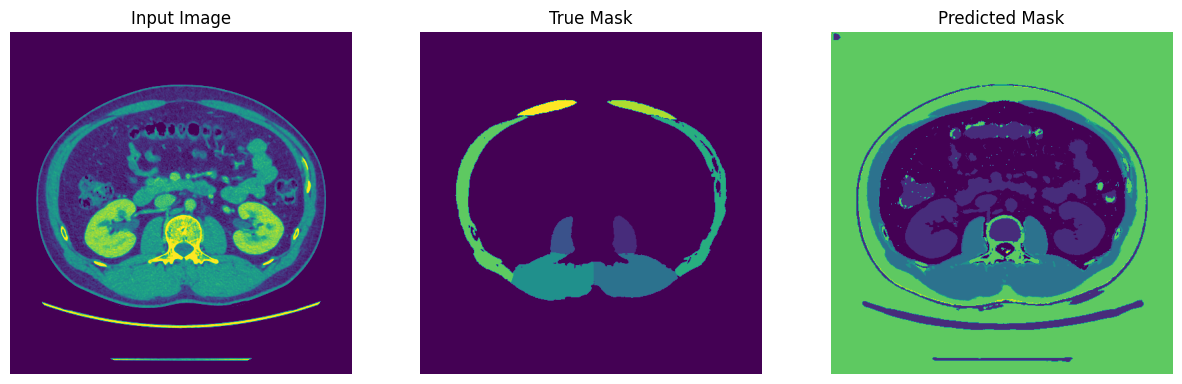

(512, 512, 3)
8/8 [==============================] - 0s 12ms/step
(8, 512, 512, 1)


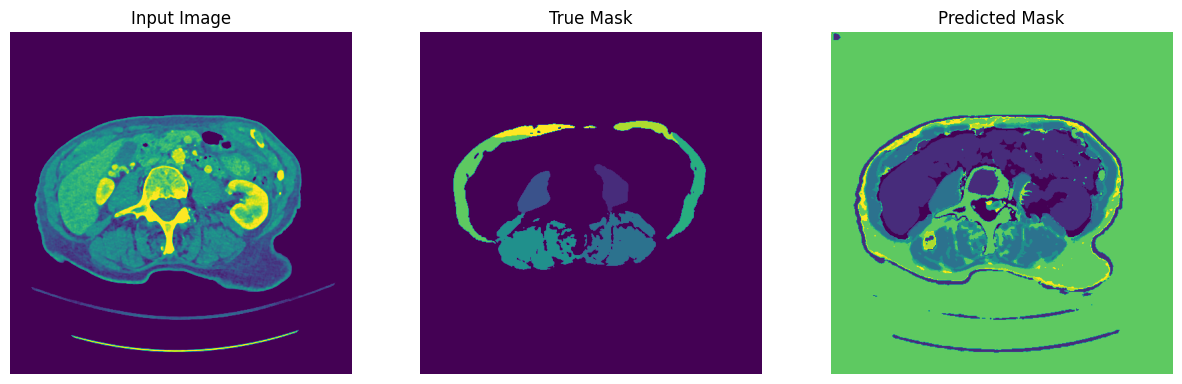

Epoch 1/30


2024-12-03 05:54:39.087188: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_17/dropout_88/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - ETA: 0s - loss: -0.0977 - accuracy: 0.1350
Epoch 1: val_loss improved from inf to -0.02956, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n4.keras
20/20 [==============================] - 10s 324ms/step - loss: -0.0977 - accuracy: 0.1350 - val_loss: -0.0296 - val_accuracy: 0.1428
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: -0.1531 - accuracy: 0.1625
Epoch 2: val_loss improved from -0.02956 to -0.03666, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n4.keras
20/20 [==============================] - 5s 283ms/step - loss: -0.1531 - accuracy: 0.1625 - val_loss: -0.0367 - val_accuracy: 0.1523
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: -0.1858 - accuracy: 0.1653
Epoch 3: val_loss improved from -0.03666 to -0.06565, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n4.keras
20/20 [==============================] - 5s 276ms/step - loss: -0.1858 

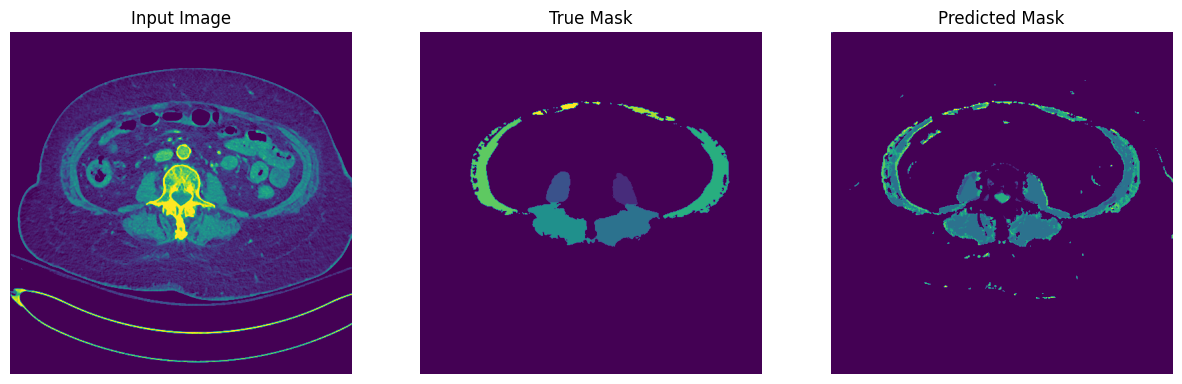

(512, 512, 3)
8/8 [==============================] - 0s 12ms/step
(8, 512, 512, 1)


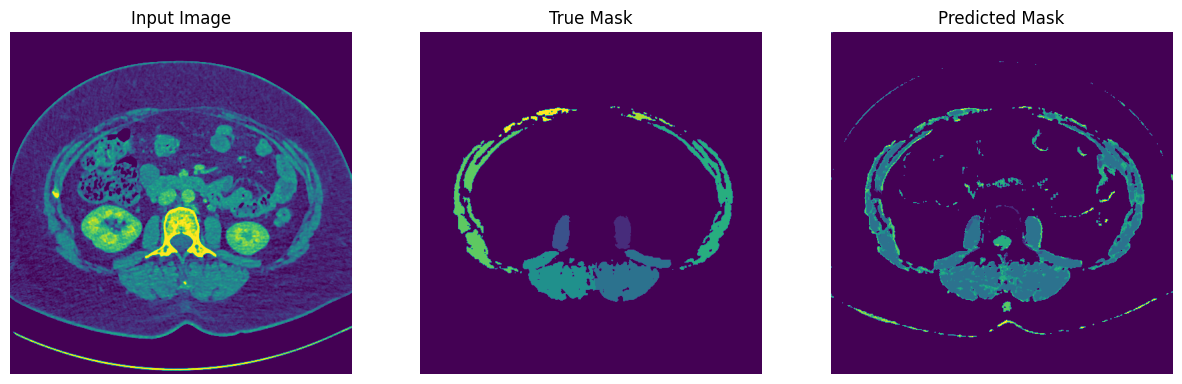

Epoch 1/30


2024-12-03 05:56:59.466227: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_19/dropout_99/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


20/20 [==============================] - ETA: 0s - loss: -0.0879 - accuracy: 0.0969
Epoch 1: val_loss improved from inf to -0.05845, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n6.keras
20/20 [==============================] - 10s 338ms/step - loss: -0.0879 - accuracy: 0.0969 - val_loss: -0.0584 - val_accuracy: 0.1431
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: -0.1704 - accuracy: 0.1239
Epoch 2: val_loss improved from -0.05845 to -0.11173, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n6.keras
20/20 [==============================] - 6s 298ms/step - loss: -0.1704 - accuracy: 0.1239 - val_loss: -0.1117 - val_accuracy: 0.1382
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: -0.2186 - accuracy: 0.1134
Epoch 3: val_loss improved from -0.11173 to -0.13230, saving model to model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n6.keras
20/20 [==============================] - 6s 287ms/step - loss: -0.2186 

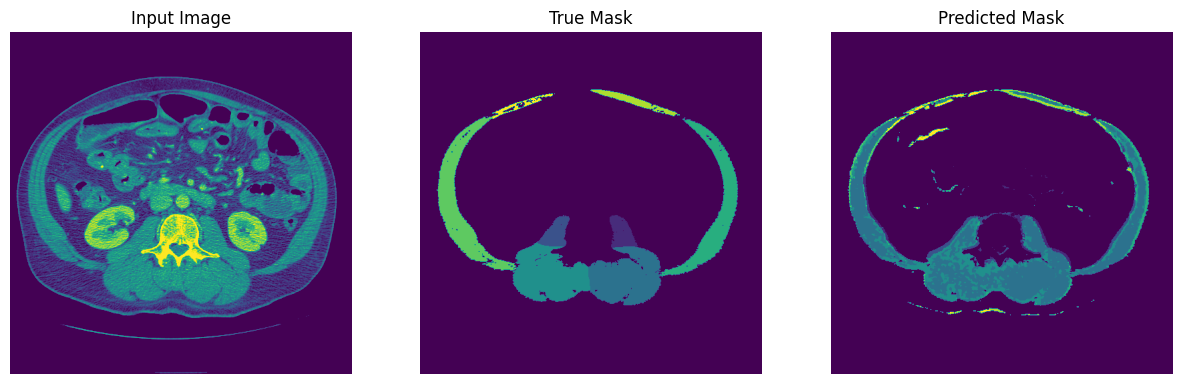

(512, 512, 3)
8/8 [==============================] - 0s 11ms/step
(8, 512, 512, 1)


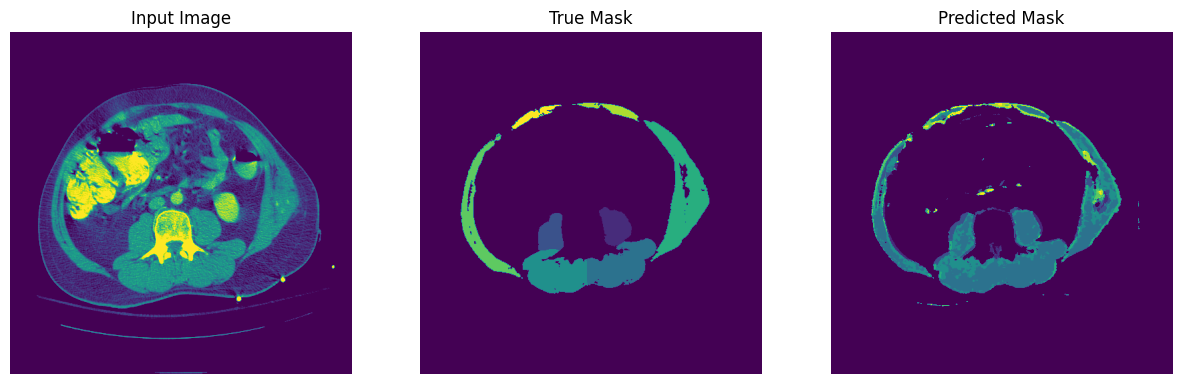

In [15]:
n_layers_unfreeze = [1, 3, 4, 6]
n = len(n_layers_unfreeze)
val_losses = np.zeros((n, ))
losses = np.zeros((n, ))
accuracy = np.zeros((n, ))
val_accuracy = np.zeros((n, ))

for i, n_layer in enumerate(n_layers_unfreeze):
    model_frozen_encoder = load_c2c_model()
    for ii in np.arange(-1, - (1 + n_layer), -1, dtype=int):
        model_frozen_encoder.layers[ii].trainable = True

    _, history, _, _ = train_unet(model_frozen_encoder, epochs=30, batch_size=8, lr=5e-2, \
                                                    verbose=1, modelname=f'frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n{n_layer}')

    losses[i] = history.history['loss'][-1]
    val_losses[i] = history.history['val_loss'][-1]
    accuracy[i] = history.history['accuracy'][-1]
    val_accuracy[i] = history.history['val_accuracy'][-1]


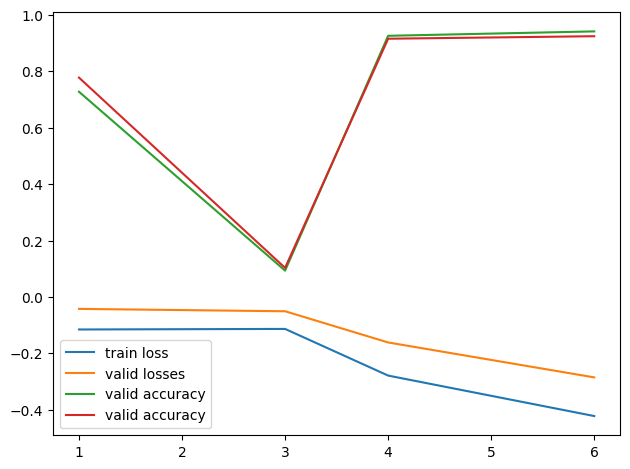

In [17]:
plt.figure()
plt.plot(n_layers_unfreeze, losses, label='train loss')
plt.plot(n_layers_unfreeze, val_losses, label='valid losses')
plt.plot(n_layers_unfreeze, accuracy, label='valid accuracy')
plt.plot(n_layers_unfreeze, val_accuracy, label='valid accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/n_layers_unfreeze_decoder.png', dpi=300)

Freeze encoder - train the last 4 decoder layers - fine-tune full model

Epoch 1/200


2024-12-03 06:41:24.352741: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_17/dropout_88/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - ETA: 0s - loss: -0.3567 - accuracy: 0.9316
Epoch 1: val_loss improved from inf to -0.37094, saving model to model_frozen_last4_encoder/step2_fulltune_bs16_200epochs_lr1e3.keras
10/10 [==============================] - 26s 1s/step - loss: -0.3567 - accuracy: 0.9316 - val_loss: -0.3709 - val_accuracy: 0.9190
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: -0.5452 - accuracy: 0.9436
Epoch 2: val_loss improved from -0.37094 to -0.38734, saving model to model_frozen_last4_encoder/step2_fulltune_bs16_200epochs_lr1e3.keras
10/10 [==============================] - 11s 1s/step - loss: -0.5452 - accuracy: 0.9436 - val_loss: -0.3873 - val_accuracy: 0.9105
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: -0.6722 - accuracy: 0.9562
Epoch 3: val_loss did not improve from -0.38734
10/10 [==============================] - 7s 721ms/step - loss: -0.6722 - accuracy: 0.9562 - val_loss: -0.3639 - val_accuracy: 0.9040
Epoch 4/

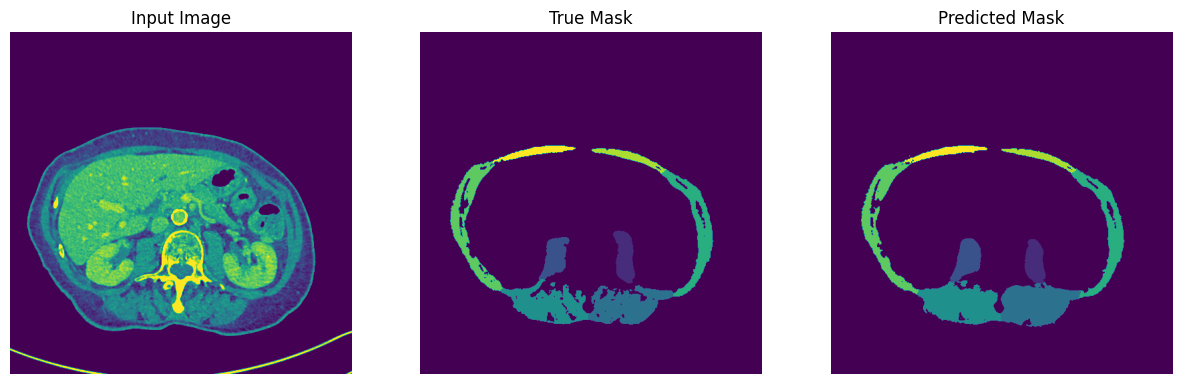

(512, 512, 3)
16/16 [==============================] - 0s 13ms/step
(16, 512, 512, 1)


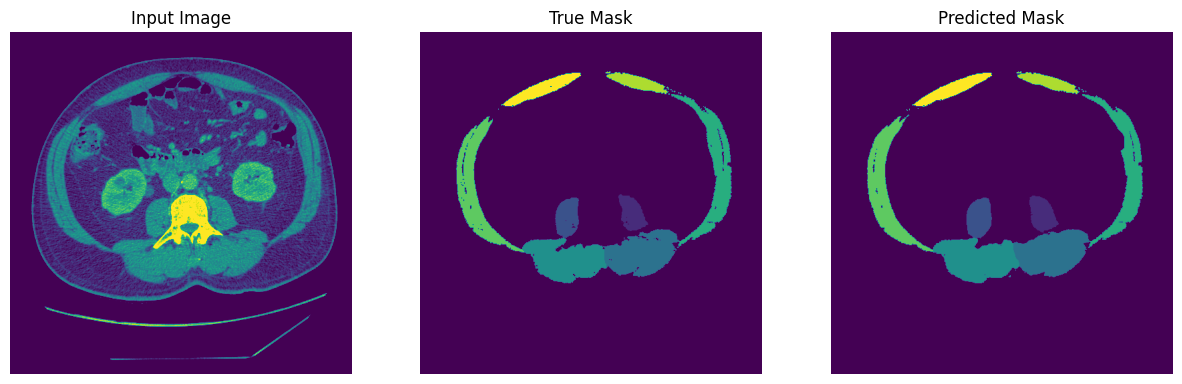

In [21]:
model_frozen_encoder = load_model('model_frozen_lastn_encoder/step1_bs8_30epochs_lr5e2_n4.keras', custom_objects={"dice_coef_multilabel": dice_coef_multilabel})
model_frozen_encoder.trainable = True

model, history, _, _ = train_unet(model_frozen_encoder, epochs=200, batch_size=16, lr=0.001, \
                                verbose=1, modelname='frozen_last4_encoder/step2_fulltune_bs16_200epochs_lr1e3', \
                                    use_lr_scheduler=False)

Epoch 1/300


2024-12-03 07:43:17.492987: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_17/dropout_88/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - ETA: 0s - loss: -0.9596 - accuracy: 0.9937
Epoch 1: val_loss improved from inf to -0.86174, saving model to model_frozen_last4_encoder/step3_fulltune_bs16_300epochs_lr1e3.keras
10/10 [==============================] - 23s 1s/step - loss: -0.9596 - accuracy: 0.9937 - val_loss: -0.8617 - val_accuracy: 0.9836
Epoch 2/300
10/10 [==============================] - ETA: 0s - loss: -0.9598 - accuracy: 0.9936
Epoch 2: val_loss improved from -0.86174 to -0.86507, saving model to model_frozen_last4_encoder/step3_fulltune_bs16_300epochs_lr1e3.keras
10/10 [==============================] - 11s 1s/step - loss: -0.9598 - accuracy: 0.9936 - val_loss: -0.8651 - val_accuracy: 0.9836
Epoch 3/300
10/10 [==============================] - ETA: 0s - loss: -0.9603 - accuracy: 0.9936
Epoch 3: val_loss improved from -0.86507 to -0.86522, saving model to model_frozen_last4_encoder/step3_fulltune_bs16_300epochs_lr1e3.keras
10/10 [==============================] - 11s 1s/st

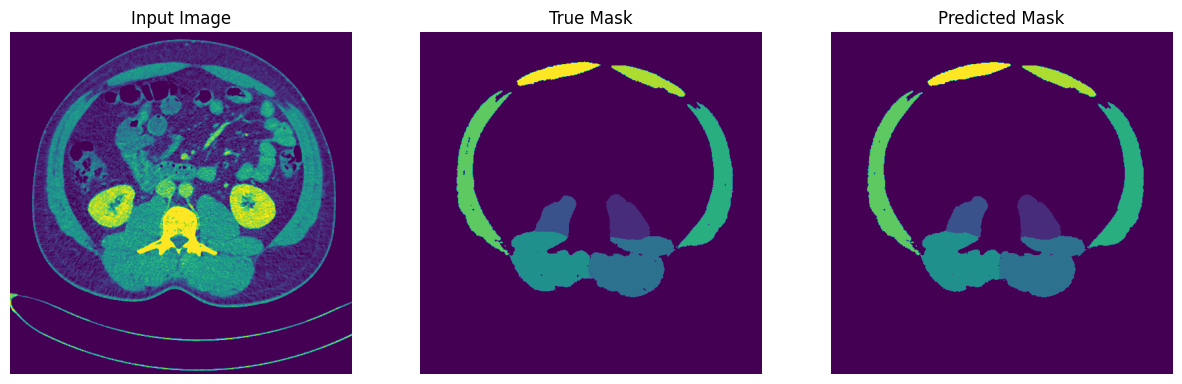

(512, 512, 3)
16/16 [==============================] - 0s 13ms/step
(16, 512, 512, 1)


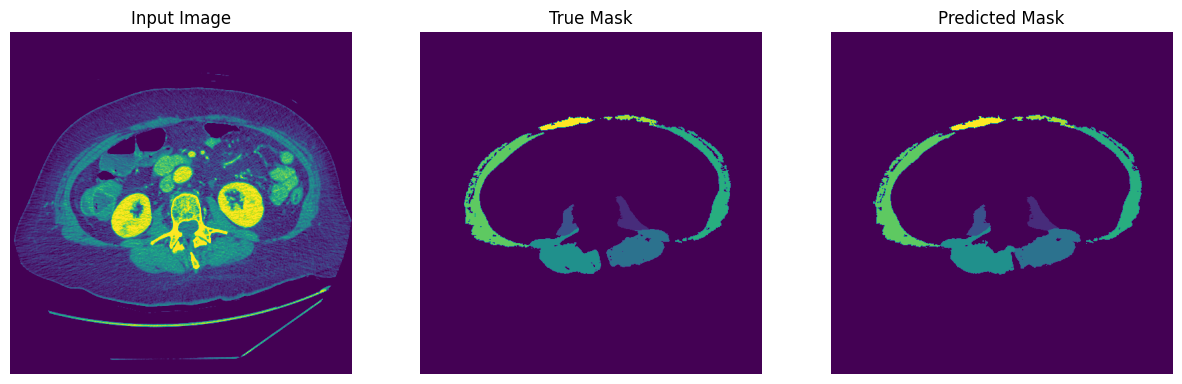

In [23]:
model_frozen_encoder = load_model('model_frozen_last4_encoder/step2_fulltune_bs16_200epochs_lr1e3.keras', custom_objects={"dice_coef_multilabel": dice_coef_multilabel})
model_frozen_encoder.trainable = True

model, history, _, _ = train_unet(model_frozen_encoder, epochs=300, batch_size=16, lr=0.001, \
                                verbose=1, modelname='frozen_last4_encoder/step3_fulltune_bs16_300epochs_lr1e3', \
                                    use_lr_scheduler=False)

Epoch 1/300


2024-12-03 18:35:36.807100: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_17/dropout_88/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - ETA: 0s - loss: -0.9724 - accuracy: 0.9954
Epoch 1: val_loss improved from inf to -0.89306, saving model to model_frozen_last4_encoder/step4_fulltune_bs16_300epochs_lr1e3.keras
10/10 [==============================] - 26s 1s/step - loss: -0.9724 - accuracy: 0.9954 - val_loss: -0.8931 - val_accuracy: 0.9865
Epoch 2/300
10/10 [==============================] - ETA: 0s - loss: -0.9728 - accuracy: 0.9955
Epoch 2: val_loss improved from -0.89306 to -0.89836, saving model to model_frozen_last4_encoder/step4_fulltune_bs16_300epochs_lr1e3.keras
10/10 [==============================] - 11s 1s/step - loss: -0.9728 - accuracy: 0.9955 - val_loss: -0.8984 - val_accuracy: 0.9866
Epoch 3/300
10/10 [==============================] - ETA: 0s - loss: -0.9724 - accuracy: 0.9955
Epoch 3: val_loss did not improve from -0.89836
10/10 [==============================] - 7s 719ms/step - loss: -0.9724 - accuracy: 0.9955 - val_loss: -0.8874 - val_accuracy: 0.9864
Epoch 4/

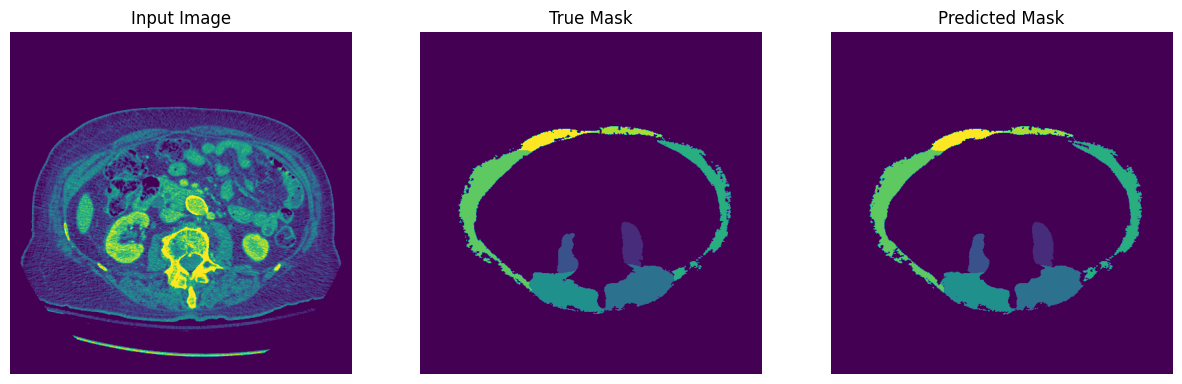

(512, 512, 3)
16/16 [==============================] - 0s 12ms/step
(16, 512, 512, 1)


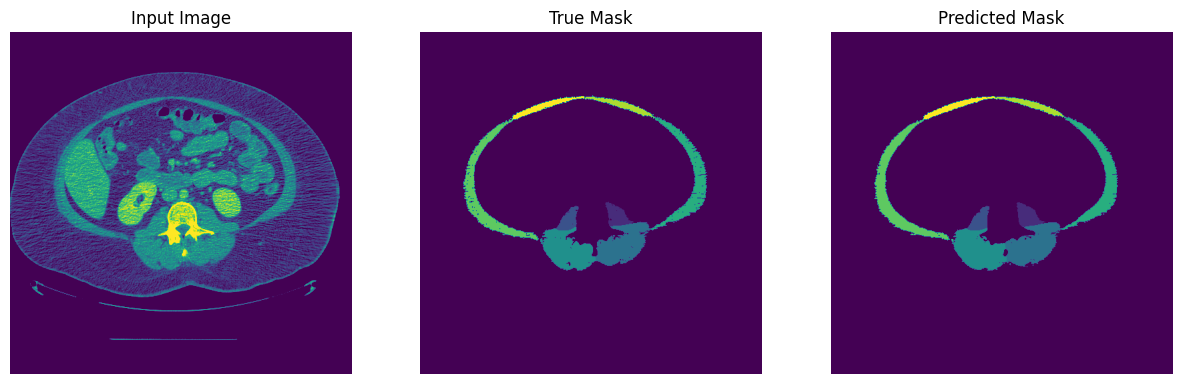

In [26]:
modelname = 'frozen_last4_encoder/step3_fulltune_bs16_300epochs_lr1e3'
model_frozen_encoder = load_model(f'model_{modelname}.keras', custom_objects={"dice_coef_multilabel": dice_coef_multilabel})
model_frozen_encoder.trainable = True

model, history, _, _ = train_unet(model_frozen_encoder, epochs=300, batch_size=16, lr=0.001, \
                                verbose=1, modelname='frozen_last4_encoder/step4_fulltune_bs16_300epochs_lr1e3', \
                                    use_lr_scheduler=False)

Epoch 1/300


2024-12-03 19:22:24.390935: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_17/dropout_88/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - ETA: 0s - loss: -0.9784 - accuracy: 0.9964
Epoch 1: val_loss improved from inf to -0.90546, saving model to model_frozen_last4_encoder/step5_fulltune_bs16_300epochs_lr5e4.keras
10/10 [==============================] - 24s 1s/step - loss: -0.9784 - accuracy: 0.9964 - val_loss: -0.9055 - val_accuracy: 0.9872
Epoch 2/300
10/10 [==============================] - ETA: 0s - loss: -0.9785 - accuracy: 0.9964
Epoch 2: val_loss improved from -0.90546 to -0.90655, saving model to model_frozen_last4_encoder/step5_fulltune_bs16_300epochs_lr5e4.keras
10/10 [==============================] - 11s 1s/step - loss: -0.9785 - accuracy: 0.9964 - val_loss: -0.9065 - val_accuracy: 0.9873
Epoch 3/300
10/10 [==============================] - ETA: 0s - loss: -0.9783 - accuracy: 0.9964
Epoch 3: val_loss did not improve from -0.90655
10/10 [==============================] - 7s 709ms/step - loss: -0.9783 - accuracy: 0.9964 - val_loss: -0.9063 - val_accuracy: 0.9872
Epoch 4/

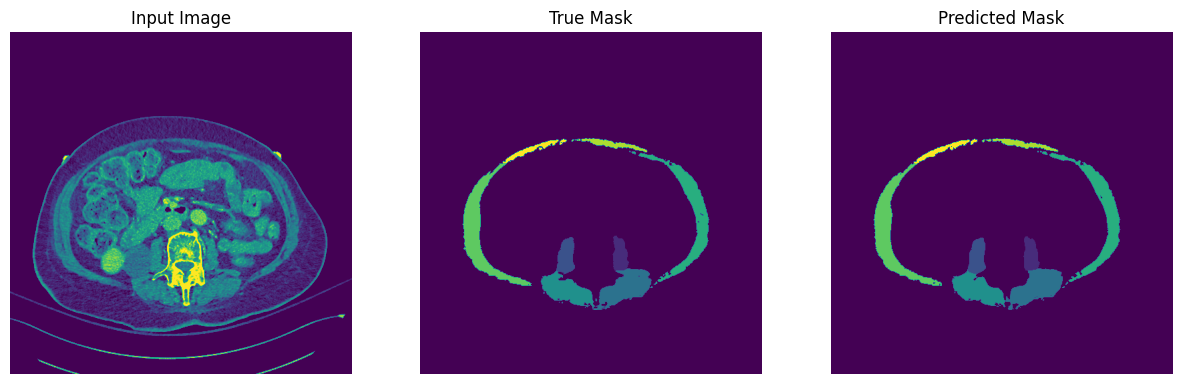

(512, 512, 3)
16/16 [==============================] - 0s 12ms/step
(16, 512, 512, 1)


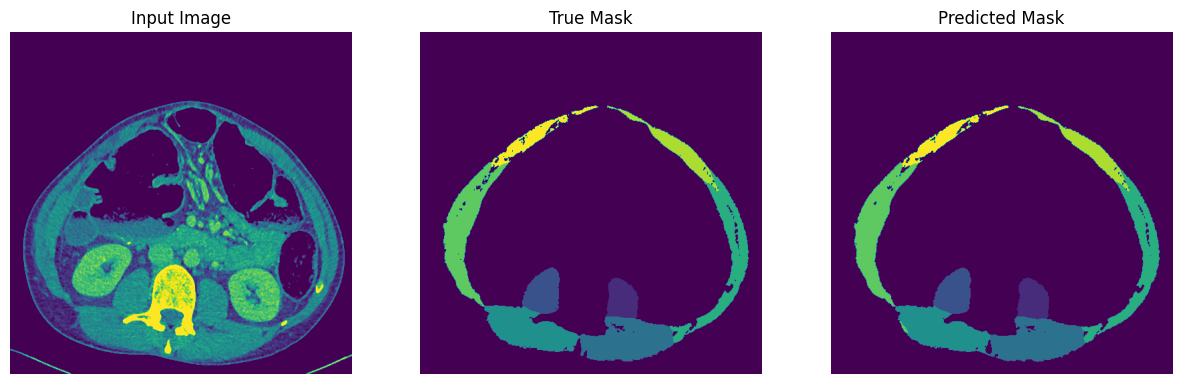

In [29]:
modelname = 'frozen_last4_encoder/step4_fulltune_bs16_300epochs_lr1e3'
model_frozen_encoder = load_model(f'model_{modelname}.keras', custom_objects={"dice_coef_multilabel": dice_coef_multilabel})
model_frozen_encoder.trainable = True

model, history, _, _ = train_unet(model_frozen_encoder, epochs=300, batch_size=16, lr=0.0005, \
                                verbose=1, modelname='frozen_last4_encoder/step5_fulltune_bs16_300epochs_lr5e4', \
                                    use_lr_scheduler=False)